# Data Science Job Postings Analysis

In this project, I scraped job postings from Indeed for data science roles in three cities - Toronto, New York City, and San Francisco. The objective is to analyze how the job markets compare and what skills in data science are currently highly in demand. 

Below are the some of the questions I wanted to address in the analysis:
- What are the top skills employers are currently looking for?
- Are certain companies or types of companies/industries posting more data science related jobs?
- Are job titles an accurate representation of what the job description/skills summary states?
- Analysis by job locations - how many roles are now remote vs in the office?
- How many years of industry experience are jobs typically looking for?
- What tools are the most commonly asked for in the postings?
- Are US based companies in NYC or SF, also hiring in Toronto?
- For a few jobs where the job salary is listed, what does the average range look like? 

# Importing the scraped data for all cities

In [1]:
# importing the libraries that will be used in the analysis 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.offline as py
import plotly.tools as tls
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# loading the Toronto job postings dataset
dfT = pd.read_csv('job_postings_Toronto.csv')

In [3]:
# looking at the first few instances of the dataframe
dfT.head()

,job_title,company,job_location,post_date,extract_date,job_description,job_salary
0,Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Support peer developers to make sure that all ...,NaN
1,Sr. Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Understanding of high performance data science...,NaN
2,Data Scientist,CJR Wholesale Grocers and Dairy Central,"Mississauga, ON",3 days ago,2022-04-25,Initial data investigation and exploratory dat...,NaN
3,"Data Science Manager (Remote, Canada)",Shopify,"Remote in Toronto, ON",6 days ago,2022-04-25,Experience building and managing high performa...,NaN
4,Data Science Manager,Capital One - Canada,"Hybrid remote in Toronto, ON",Today,2022-04-25,Overseeing the development of software to clea...,NaN


In [4]:
# loading the San Francisco job postings dataset
dfS = pd.read_csv('job_postings_SF.csv')

In [5]:
# loading the New York job postings dataset
dfN = pd.read_csv('job_postings_NY.csv')

## Topic Modelling for Toronto jobs using non-negative matrix factorization (NMF)

In [6]:
# first converting the job_description to a matrix of TF-IDF features.
tfidf = TfidfVectorizer(max_df=0.95, stop_words='english')
# max_df of 0.95 is defined to ignore terms that have a document frequency higher than 95% (could help omit some stop words)

In [7]:
dtm = tfidf.fit_transform(dfT['job_description'])


In [8]:
nmf_model = NMF(n_components=6,random_state=42)

In [9]:
nmf_model.fit(dtm) 

NMF(n_components=6, random_state=42)

In [10]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['modeling', 'develop', 'architecture', 'including', 'sources', 'processes', 'knowledge', 'quality', 'governance', 'visualization', 'understanding', 'science', 'analytics', 'management', 'data']


THE TOP 15 WORDS FOR TOPIC #1
['relevant', 'mathematics', 'math', 'economics', 'bachelor', 'operations', 'research', 'statistics', 'applied', 'related', 'field', 'engineering', 'computer', 'degree', 'science']


THE TOP 15 WORDS FOR TOPIC #2
['use', 'group', 'techniques', 'models', 'design', 'algorithms', 'looking', 'statistical', 'software', 'develop', 'mining', 'engineering', 'ai', 'machine', 'learning']


THE TOP 15 WORDS FOR TOPIC #3
['working', 'modeling', 'knowledge', 'science', 'hadoop', 'industry', 'hands', 'sql', 'systems', 'technologies', 'spark', 'big', 'data', 'years', 'experience']


THE TOP 15 WORDS FOR TOPIC #4
['actionable', 'open', 'ideas', 'clustering', 'ended', 'segmentation', 'run', 'insights', 'data', 'generate', 'opportunities', 'identify', 

In [11]:
topic_results = nmf_model.transform(dtm)

In [12]:
dfT['Topic'] = topic_results.argmax(axis=1)

In [13]:
dfT.tail(20)

,job_title,company,job_location,post_date,extract_date,job_description,job_salary,Topic
682,"Senior, Computer Vision Researcher/Engineer, 3...",Magic Leap - Multiple Locations,"Toronto, ON",30+ days ago,2022-04-25,3D Scene Understanding: Design and implement 3...,NaN,0
683,"Principal Statistical Programmer, Late Stage -...",POINT Biopharma,"Remote in Toronto, ON",30+ days ago,2022-04-25,Responsible for the creation and accuracy of r...,NaN,0
684,Product Manager - Safety AI,Veeva Systems,"Remote in Toronto, ON",30+ days ago,2022-04-25,Degree in computer science or engineering.\nEx...,NaN,1
685,Associate Director - Analytics Consulting (Can...,Tiger Analytics,"Toronto, ON",19 days ago,2022-04-25,Work on the latest applications of data scienc...,NaN,5
686,Machine learning / High Performance Compute Re...,"Advanced Micro Devices, Inc.","Markham, ON",30+ days ago,2022-04-25,As release program manager in AMD’s machine le...,NaN,2
687,Big Data Technical Lead,Quantexa,"Toronto, ON",30+ days ago,2022-04-25,"Proven big data experience, either from an imp...",NaN,3
688,Digital Strategy Innovation Principal Director,Accenture,"Toronto, ON",28 days ago,2022-04-25,Experience guiding the data formulation proces...,NaN,3
689,Senior Machine Learning Engineer (MLOps),ACV Auctions,"Toronto, ON",30+ days ago,2022-04-25,Data Science skills like vectorized scientific...,NaN,4
690,Senior Machine Learning Engineer - Performance...,Tonal,"Toronto, ON",28 days ago,2022-04-25,"Implement algorithms on real-time, large-scale...",NaN,2
691,"Senior Site Reliability Engineer, Machine Lear...",SoundHound Inc.,"Toronto, ON",30+ days ago,2022-04-25,Expand and manage the GPU-based Machine Learni...,NaN,2


In [14]:
mytopic_dict = {0:'Data Management and Engineering',1:'Stats/CS background',2:'ML algorithms and models',3:'Big Data and Cloud/Distributed Computing',4:'EDA and Segmentation experience',5:'Managing data science teams'}

In [15]:
dfT['topic_label'] = dfT['Topic'].map(mytopic_dict)

In [16]:
dfT.head()

,job_title,company,job_location,post_date,extract_date,job_description,job_salary,Topic,topic_label
0,Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Support peer developers to make sure that all ...,NaN,0,Data Management and Engineering
1,Sr. Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Understanding of high performance data science...,NaN,0,Data Management and Engineering
2,Data Scientist,CJR Wholesale Grocers and Dairy Central,"Mississauga, ON",3 days ago,2022-04-25,Initial data investigation and exploratory dat...,NaN,2,ML algorithms and models
3,"Data Science Manager (Remote, Canada)",Shopify,"Remote in Toronto, ON",6 days ago,2022-04-25,Experience building and managing high performa...,NaN,3,Big Data and Cloud/Distributed Computing
4,Data Science Manager,Capital One - Canada,"Hybrid remote in Toronto, ON",Today,2022-04-25,Overseeing the development of software to clea...,NaN,1,Stats/CS background


In [17]:
dfT['job_description'][690]

'Implement algorithms on real-time, large-scale, data and evaluate their performance.\nArchitect implementation of machine learning algorithms to model human…'

In [18]:
dfT.groupby('topic_label')['topic_label'].value_counts()

topic_label                               topic_label                             
Big Data and Cloud/Distributed Computing  Big Data and Cloud/Distributed Computing    123
Data Management and Engineering           Data Management and Engineering             201
EDA and Segmentation experience           EDA and Segmentation experience              51
ML algorithms and models                  ML algorithms and models                    118
Managing data science teams               Managing data science teams                 131
Stats/CS background                       Stats/CS background                          78
Name: topic_label, dtype: int64

In [19]:
dfT.groupby('job_title')['topic_label'].value_counts().sort_values(ascending=False).head()

job_title              topic_label                             
Data Scientist         Data Management and Engineering             10
Senior Data Analyst    Data Management and Engineering              9
                       Big Data and Cloud/Distributed Computing     8
Senior Data Scientist  Data Management and Engineering              8
Data Scientist         ML algorithms and models                     6
Name: topic_label, dtype: int64

In [20]:
text = dfT['job_description']

In [21]:
dfT['topic_label'].value_counts().sort_values(ascending=False)

Data Management and Engineering             201
Managing data science teams                 131
Big Data and Cloud/Distributed Computing    123
ML algorithms and models                    118
Stats/CS background                          78
EDA and Segmentation experience              51
Name: topic_label, dtype: int64

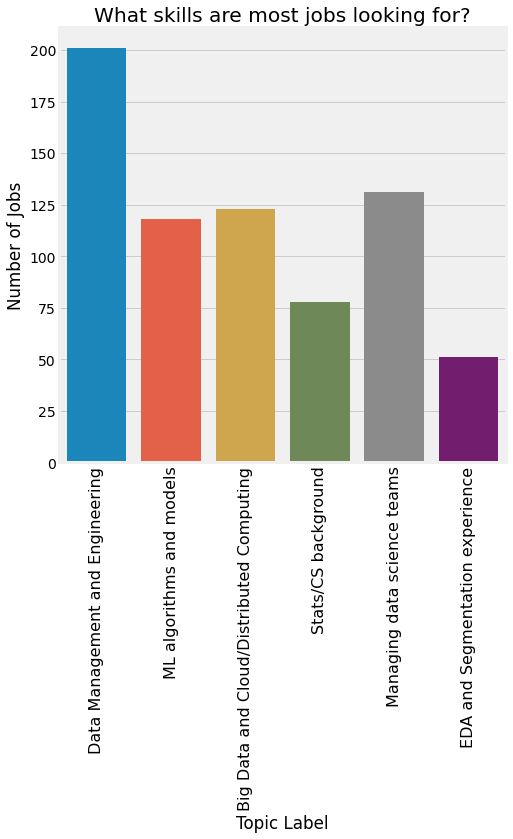

In [22]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
fig = sns.countplot(data=dfT,x=dfT["topic_label"])
plt.xlabel("Topic Label")
plt.ylabel('Number of Jobs')
plt.title('What skills are most jobs looking for?')
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize=16)

## Are certain companies posting more data science related jobs in Toronto?

In [23]:
jobs_by_company = dfT['company'].value_counts().sort_values(ascending=False).iloc[:20,]

In [24]:
jobs_by_company

Wayfair                         20
Deloitte                        14
Bell Canada                     12
Amazon Dev Centre Canada ULC    11
Royal Bank of Canada            11
TD Bank                         11
Scotiabank                      11
Tonal                           11
Citi                            10
Aviva                            9
Qcom                             8
Axon                             7
Intact                           7
Sanofi US                        7
Advanced Micro Devices, Inc.     7
Pinterest                        7
Yelp                             7
TELUS                            7
Rogers Communications            6
EY                               6
Name: company, dtype: int64

In [25]:

sns.set()

<AxesSubplot:title={'center':'Which companies have been posting most of the data science jobs in Toronto?'}, xlabel='company', ylabel='Number of Jobs'>

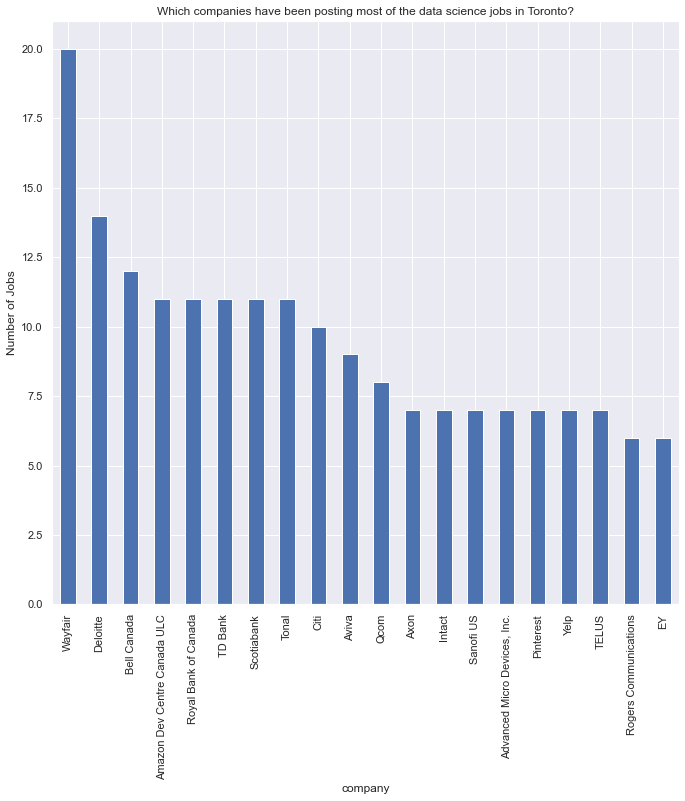

In [26]:
plt.figure(figsize=(10,10))
plt.ylabel('Number of Jobs')
plt.title('Which companies have been posting most of the data science jobs in Toronto?')
jobs_by_company.plot(kind='bar',xlabel='company')

In [27]:
top_companies = ['Wayfair','Deloitte','Bell Canada','TD Bank', 'Royal Bank of Canada']

In [28]:
dfT_top_companies = dfT.loc[[x in top_companies for x in dfT['company'].tolist()]]

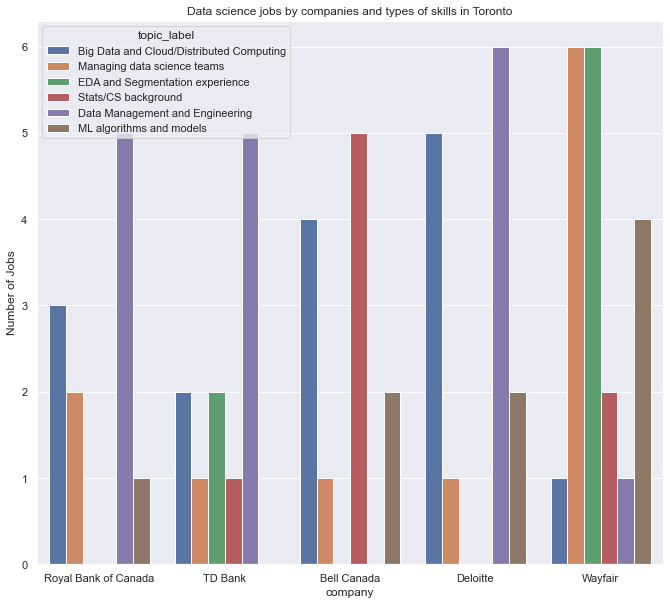

In [29]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x='company', hue="topic_label", data=dfT_top_companies)
plt.ylabel('Number of Jobs')
plt.title('Data science jobs by companies and types of skills in Toronto')
plt.show()

## Are job titles an accurate representation of what the job description/skills summary states?

In [30]:
# Applying association rules

In [31]:
job_titles = dfT['job_title'].value_counts().sort_values(ascending=False).iloc[:20,]

In [32]:
job_titles

Data Scientist                                 30
Senior Data Analyst                            23
Senior Data Scientist                          22
Machine Learning Engineer                      13
Senior Machine Learning Engineer                6
Data Analyst                                    5
Lead Data Scientist                             4
Sr. Data Analyst, MRM                           4
Staff Data Scientist                            4
Data Science Engineer                           3
Lead Data Analyst                               3
Lead Machine Learning Engineer                  3
Sr. Product Manager                             3
Senior Manager, Data Science                    3
Sr. Data Scientist                              3
Director, Data Strategy and Analytics           3
Manager, Marketing Analytics - Toronto          3
Statistical Programmer II | Remote              3
Senior Data Scientist (Toronto), Intact Lab     2
Data Scientist - Canada (Hybrid / Remote)       2


In [33]:
job_titles_search = ['Data Scientist', 'Senior Data Analyst', 'Senior Data Scientist', 'Machine Learning Engineer','Senior Machine Learning Engineer','Data Analyst']

In [34]:
pattern = '|'.join([f'(?i){title}' for title in job_titles_search])

In [35]:
pattern

'(?i)Data Scientist|(?i)Senior Data Analyst|(?i)Senior Data Scientist|(?i)Machine Learning Engineer|(?i)Senior Machine Learning Engineer|(?i)Data Analyst'

In [36]:
dfT_titles = dfT[dfT.job_title.str.contains(pattern)]

In [37]:
dfT_titles.head()

,job_title,company,job_location,post_date,extract_date,job_description,job_salary,Topic,topic_label
0,Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Support peer developers to make sure that all ...,NaN,0,Data Management and Engineering
1,Sr. Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Understanding of high performance data science...,NaN,0,Data Management and Engineering
2,Data Scientist,CJR Wholesale Grocers and Dairy Central,"Mississauga, ON",3 days ago,2022-04-25,Initial data investigation and exploratory dat...,NaN,2,ML algorithms and models
5,Data Scientist,Michael Page CA,"Hybrid remote in Toronto, ON",10 days ago,2022-04-25,As a Data Scientist you will be building tools...,NaN,5,Managing data science teams
9,Data Analyst,MSi Corp (Bell Canada),"Toronto, ON",3 days ago,2022-04-25,Experience in detailed data analysis.\nExperie...,NaN,3,Big Data and Cloud/Distributed Computing


In [38]:
dfT_titles['topic_label'].value_counts().sort_values(ascending=False).iloc[:20,]

Data Management and Engineering             95
Managing data science teams                 62
Big Data and Cloud/Distributed Computing    54
ML algorithms and models                    36
Stats/CS background                         20
EDA and Segmentation experience             16
Name: topic_label, dtype: int64

In [39]:
aprioridf = pd.get_dummies(data=dfT_titles,columns=['job_title', 'topic_label'])

In [40]:
aprioridf.head()

,company,job_location,post_date,extract_date,job_description,job_salary,Topic,job_title_AI Data Scientist,job_title_Associate - Data Scientist,job_title_Associate Data Scientist,...,"job_title_Student Intern, Data Analyst & Quote Controller",job_title_The Bay | Applied Data Scientist,job_title_data scientist,job_title_mRNA - Machine Learning Principal Data Scientist M/F,topic_label_Big Data and Cloud/Distributed Computing,topic_label_Data Management and Engineering,topic_label_EDA and Segmentation experience,topic_label_ML algorithms and models,topic_label_Managing data science teams,topic_label_Stats/CS background
0,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Support peer developers to make sure that all ...,NaN,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Understanding of high performance data science...,NaN,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CJR Wholesale Grocers and Dairy Central,"Mississauga, ON",3 days ago,2022-04-25,Initial data investigation and exploratory dat...,NaN,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,Michael Page CA,"Hybrid remote in Toronto, ON",10 days ago,2022-04-25,As a Data Scientist you will be building tools...,NaN,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,MSi Corp (Bell Canada),"Toronto, ON",3 days ago,2022-04-25,Experience in detailed data analysis.\nExperie...,NaN,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
aprioridf.drop(aprioridf.iloc[:,0:1],axis=1,inplace=True)

In [42]:
aprioridf_new = aprioridf.astype(np.bool)

In [43]:
aprioridf_new.head()

,job_location,post_date,extract_date,job_description,job_salary,Topic,job_title_AI Data Scientist,job_title_Associate - Data Scientist,job_title_Associate Data Scientist,"job_title_Associate Educator, Data Scientist",...,"job_title_Student Intern, Data Analyst & Quote Controller",job_title_The Bay | Applied Data Scientist,job_title_data scientist,job_title_mRNA - Machine Learning Principal Data Scientist M/F,topic_label_Big Data and Cloud/Distributed Computing,topic_label_Data Management and Engineering,topic_label_EDA and Segmentation experience,topic_label_ML algorithms and models,topic_label_Managing data science teams,topic_label_Stats/CS background
0,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [44]:
aprioridf_new.dtypes

job_location                                   bool
post_date                                      bool
extract_date                                   bool
job_description                                bool
job_salary                                     bool
                                               ... 
topic_label_Data Management and Engineering    bool
topic_label_EDA and Segmentation experience    bool
topic_label_ML algorithms and models           bool
topic_label_Managing data science teams        bool
topic_label_Stats/CS background                bool
Length: 175, dtype: object

In [45]:


frequent_itemsets = apriori(aprioridf_new, min_support=0.001, use_colnames=True)

In [46]:
frequent_itemsets.sort_values(by=['support'], ascending=False).head()

,support,itemsets
0,1.0,(job_location)
3173,1.0,"(job_description, extract_date, job_salary)"
522,1.0,"(job_description, extract_date)"
2519,1.0,"(job_description, job_salary, post_date)"
5584,1.0,"(job_description, job_location, extract_date, ..."


In [47]:
rules = association_rules(frequent_itemsets, min_threshold=0.1)

In [48]:
def is_any_in(set1, set2):
    c = set1.intersection(set2)
    return len(c) != 0

In [49]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

In [50]:

search_set = set({'job_title_Data Scientist'})

sub = rules[(rules['antecedents'].apply(lambda x: is_any_in(search_set, x))) & 
            (rules['antecedent_len'] >=1) ].sort_values('lift', ascending=False)

sub.shape
display(sub.head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
189868,"(extract_date, Topic, job_description, job_loc...",(topic_label_ML algorithms and models),0.070671,0.127208,0.021201,0.3,2.358333,0.012211,1.246845,5
94438,"(Topic, job_title_Data Scientist)","(topic_label_ML algorithms and models, job_loc...",0.070671,0.127208,0.021201,0.3,2.358333,0.012211,1.246845,2
249461,"(Topic, extract_date, post_date, job_title_Dat...","(topic_label_ML algorithms and models, job_loc...",0.070671,0.127208,0.021201,0.3,2.358333,0.012211,1.246845,4
292989,"(Topic, job_salary, job_title_Data Scientist)","(topic_label_ML algorithms and models, extract...",0.070671,0.127208,0.021201,0.3,2.358333,0.012211,1.246845,3
292992,"(job_description, Topic, job_title_Data Scient...","(topic_label_ML algorithms and models, extract...",0.070671,0.127208,0.021201,0.3,2.358333,0.012211,1.246845,3


In [51]:
search_set = set({'job_title_Machine Learning Engineer'})

sub = rules[(rules['antecedents'].apply(lambda x: is_any_in(search_set, x))) & 
            (rules['antecedent_len'] >=1) ].sort_values('lift', ascending=False)

sub.shape
display(sub.head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
195276,"(job_title_Machine Learning Engineer, Topic, j...","(topic_label_ML algorithms and models, extract...",0.031802,0.127208,0.017668,0.555556,4.367284,0.013622,1.963781,4
118015,"(job_title_Machine Learning Engineer, Topic)","(topic_label_ML algorithms and models, post_da...",0.031802,0.127208,0.017668,0.555556,4.367284,0.013622,1.963781,2
297747,"(extract_date, post_date, Topic, job_salary, j...",(topic_label_ML algorithms and models),0.031802,0.127208,0.017668,0.555556,4.367284,0.013622,1.963781,7
251928,"(Topic, job_title_Machine Learning Engineer, e...","(topic_label_ML algorithms and models, job_loc...",0.031802,0.127208,0.017668,0.555556,4.367284,0.013622,1.963781,3
120029,"(job_title_Machine Learning Engineer, job_sala...",(topic_label_ML algorithms and models),0.031802,0.127208,0.017668,0.555556,4.367284,0.013622,1.963781,4


In [52]:
search_set = set({'job_title_Senior Data Scientist'})

sub = rules[(rules['antecedents'].apply(lambda x: is_any_in(search_set, x))) & 
            (rules['antecedent_len'] >=1) ].sort_values('lift', ascending=False)

sub.shape
display(sub.head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
118564,"(job_title_Senior Data Scientist, Topic, post_...","(job_description, topic_label_Stats/CS backgro...",0.04947,0.070671,0.010601,0.214286,3.032143,0.007105,1.182782,3
227242,"(job_title_Senior Data Scientist, Topic, job_d...","(job_salary, extract_date, topic_label_Stats/C...",0.04947,0.070671,0.010601,0.214286,3.032143,0.007105,1.182782,3
192256,"(job_title_Senior Data Scientist, Topic, job_l...","(job_description, extract_date, topic_label_St...",0.04947,0.070671,0.010601,0.214286,3.032143,0.007105,1.182782,3
279850,"(job_title_Senior Data Scientist, Topic, job_l...","(job_salary, extract_date, topic_label_Stats/C...",0.04947,0.070671,0.010601,0.214286,3.032143,0.007105,1.182782,3
279849,"(job_title_Senior Data Scientist, Topic, job_d...","(job_location, job_salary, extract_date, topic...",0.04947,0.070671,0.010601,0.214286,3.032143,0.007105,1.182782,3


## Analysis by job locations - how many roles are now remote vs in the office?

In [53]:
dfT['Remote?'] = dfT.job_location.str.contains('remote', case=False)

In [54]:
dfT.head()

,job_title,company,job_location,post_date,extract_date,job_description,job_salary,Topic,topic_label,Remote?
0,Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Support peer developers to make sure that all ...,NaN,0,Data Management and Engineering,True
1,Sr. Data Scientist,Air Miles,"Temporarily Remote in Toronto, ON",4 days ago,2022-04-25,Understanding of high performance data science...,NaN,0,Data Management and Engineering,True
2,Data Scientist,CJR Wholesale Grocers and Dairy Central,"Mississauga, ON",3 days ago,2022-04-25,Initial data investigation and exploratory dat...,NaN,2,ML algorithms and models,False
3,"Data Science Manager (Remote, Canada)",Shopify,"Remote in Toronto, ON",6 days ago,2022-04-25,Experience building and managing high performa...,NaN,3,Big Data and Cloud/Distributed Computing,True
4,Data Science Manager,Capital One - Canada,"Hybrid remote in Toronto, ON",Today,2022-04-25,Overseeing the development of software to clea...,NaN,1,Stats/CS background,True


In [55]:
dfT['Remote?'].value_counts().sort_values(ascending=False)

False    506
True     196
Name: Remote?, dtype: int64

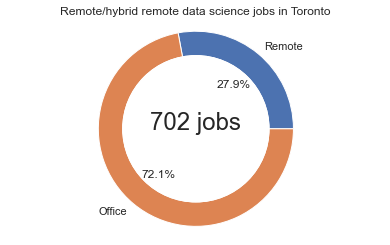

In [56]:
fig, ax = plt.subplots()

remote = 196/702*100
office = 506/702*100
labels = ['Remote','Office']
sizes = [remote, office]

plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Remote/hybrid remote data science jobs in Toronto')

circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
ax.add_patch(circle)
label = ax.annotate("702 jobs", xy=(0, 0), fontsize=24, ha="center")

plt.gca().add_artist(circle)

plt.show()

In [57]:
dfN['Remote?'] = dfN.job_location.str.contains('remote', case=False)

In [58]:
dfN['Remote?'].value_counts().sort_values(ascending=False)

False    652
True     316
Name: Remote?, dtype: int64

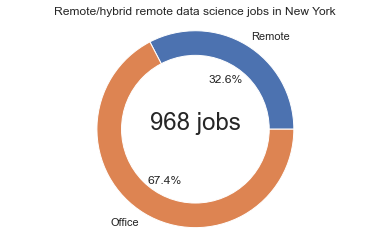

In [59]:
fig, ax = plt.subplots()
remote = 316/968*100
office = 652/968*100
labels = ['Remote','Office']
sizes = [remote, office]

plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Remote/hybrid remote data science jobs in New York')

circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
ax.add_patch(circle)
label = ax.annotate("968 jobs", xy=(0, 0), fontsize=24, ha="center")

plt.show()

In [60]:
dfS['Remote?'] = dfS.job_location.str.contains('remote', case=False)

In [61]:
dfS['Remote?'].value_counts().sort_values(ascending=False)

False    143
True     142
Name: Remote?, dtype: int64

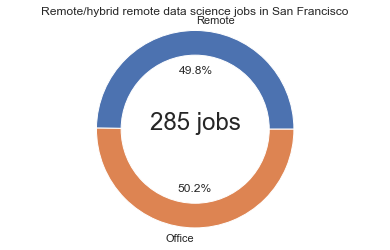

In [62]:
fig, ax = plt.subplots()

remote = 142/285*100
office = 143/285*100
labels = ['Remote','Office']
sizes = [remote, office]

plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Remote/hybrid remote data science jobs in San Francisco')

circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
ax.add_patch(circle)
label = ax.annotate("285 jobs", xy=(0, 0), fontsize=24, ha="center")

plt.show()

## How many years of industry experience are jobs typically looking for?

In [63]:
exp = 'experience|years'

In [64]:
dfT.job_description.str.contains('1 year')

0      False
1      False
2      False
3      False
4      False
       ...  
697    False
698    False
699    False
700    False
701    False
Name: job_description, Length: 702, dtype: bool

In [65]:
dfT['job_description'][3]

'Experience building and managing high performance data science teams.\n7-10 years of commercial experience as in a data science role solving high impact business…'

In [66]:
dfT['years_exp']=dfT.job_description.str.extract('([1-9])')

In [67]:
dfT['years_exp'].value_counts().sort_values(ascending=False)

3    20
5    19
1    14
2    14
7     6
8     5
4     5
6     2
Name: years_exp, dtype: int64

In [68]:
dfN['years_exp']=dfN.job_description.str.extract('([1-9])')

In [69]:
dfN['years_exp'].value_counts().sort_values(ascending=False)

3    43
2    41
5    30
1    30
4    13
8     3
7     3
6     1
Name: years_exp, dtype: int64

In [70]:
dfS['years_exp']=dfN.job_description.str.extract('([1-9])')

In [71]:
dfS['years_exp'].value_counts().sort_values(ascending=False)

3    18
2    15
1    11
5     6
4     6
8     1
Name: years_exp, dtype: int64

## What skills/experience is the most commonly asked for in all the data science job postings?

In [72]:
dfCombined = pd.concat([dfT, dfN, dfS])

In [73]:
dfCombined['job_description'] = dfCombined['job_description'].str.lower()

In [74]:
# # Parsing keywords of skills/tools for each posting
keywords=['tableau', 'sql', 'python', 'spark', 'excel', 'nltk', 'tensorflow', 'scikit-learn', 'bigml','keras', 'sas', 'alteryx', 'pytorch', 'rapidminer','datarobot','hadoop','powerBI','matplotlib','ggplot','jupyter','algorithm','modeling','data structures','statistics',',machine learning','artificial intelligence','visualization','etl','database','databricks','cloud','azure','data warehousing','feature engineering','dashboards','data manipulation','data pipelines', 'degree','managing', 'data science teams','certification','partnership','manipulating large amounts of data','leadership','api integration','end-to-end delivery','big data','exploratory data analysis','ml','programming specifications','build new features']

In [75]:

dfT['skills/qualifications'] = dfT['job_description'].str.findall('|'.join(keywords), flags=re.IGNORECASE).apply(set).str.join(', ')

In [76]:
dfT.tail(30)

,job_title,company,job_location,post_date,extract_date,job_description,job_salary,Topic,topic_label,Remote?,years_exp,skills/qualifications
672,Machine learning / High Performance Compute Pr...,"Advanced Micro Devices, Inc.","Markham, ON",30+ days ago,2022-04-25,As program manager in AMD’s machine learning s...,NaN,2,ML algorithms and models,False,NaN,end-to-end delivery
673,Principal Statistical Programmer - Remote,Precision for Medicine,"Remote in Toronto, ON",30+ days ago,2022-04-25,"You are a strong SAS programmer, experienced i...",NaN,4,EDA and Segmentation experience,True,NaN,SAS
674,Staff Machine Learning Engineer – ML and Optim...,Index Exchange,"Remote in Toronto, ON",30+ days ago,2022-04-25,Design efficient data collection and ETL proce...,NaN,0,Data Management and Engineering,True,NaN,ETL
675,Senior Customer Delivery Architect - Analytics,"Amazon Web Services Canada, In","Toronto, ON",30+ days ago,2022-04-25,"Industry leadership in the fields of database,...",NaN,3,Big Data and Cloud/Distributed Computing,False,8,"data warehousing, database, leadership"
676,Senior Software Engineer - Machine Learning Pl...,Wattpad,"Remote in Toronto, ON",30+ days ago,2022-04-25,You love to deliver impactful products that ac...,NaN,5,Managing data science teams,True,NaN,Build new features
677,"Software Engineer C++, Conversational AI - Nor...",SoundHound Inc.,"Remote in Toronto, ON",30+ days ago,2022-04-25,We'd be especially excited to hear from you if...,NaN,3,Big Data and Cloud/Distributed Computing,True,NaN,manipulating large amounts of data
678,"Senior, Computer Vision Researcher/Engineer, H...",Magic Leap - Multiple Locations,"Toronto, ON",30+ days ago,2022-04-25,Provide leadership and mentoring to the resear...,NaN,1,Stats/CS background,False,NaN,leadership
679,Principal Statistical Programmer/Analyst,ClinChoice Inc,"Toronto, ON",30+ days ago,2022-04-25,"Bachelor’s degree in computer science (CS), st...",NaN,1,Stats/CS background,False,7,"SAS, degree, statistics"
680,AI Conversational Full Stack Cloud MERN Developer,Purolator,"Mississauga, ON",30+ days ago,2022-04-25,Experience with backend data / API integration...,NaN,5,Managing data science teams,False,NaN,"API integration, Cloud"
681,Machine Learning Software Engineer,Insight Global,"Greater Toronto Area, ON",EmployerActive 12 days ago,2022-04-25,The primary responsibilities of this role will...,NaN,2,ML algorithms and models,False,NaN,algorithm


In [77]:
dfT['skills/qualifications'].value_counts().sort_values(ascending=False).iloc[:30,]

                                                        368
ML                                                       19
visualization                                            17
degree                                                   13
algorithm                                                12
modeling                                                 12
Degree                                                   10
degree, statistics                                        9
cloud                                                     9
data pipelines                                            8
dashboards                                                7
managing                                                  7
leadership                                                6
SQL                                                       6
SAS                                                       6
statistics                                                5
Spark, big data, Hadoop                 

In [78]:
stop = stopwords.words('english')

In [79]:
dfCombined["job_description"] = dfCombined["job_description"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [80]:
# looking at the 30 most commonly used words in a job description
Counter(" ".join(dfCombined["job_description"]).split()).most_common(30)

[('data', 3528),
 ('experience', 667),
 ('science', 661),
 ('years', 238),
 ('science,', 215),
 ('machine', 205),
 ('learning', 171),
 ('business', 170),
 ('team', 164),
 ('analysis', 159),
 ('analytics', 153),
 ('working', 152),
 ('work', 141),
 ('data.', 138),
 ('develop', 133),
 ('using', 129),
 ('degree', 127),
 ('knowledge', 125),
 ('computer', 112),
 ('build', 103),
 ('and…', 103),
 ('engineering', 103),
 ('data,', 99),
 ('large', 97),
 ('product', 92),
 ('new', 89),
 ('tools', 88),
 ('models', 88),
 ('strong', 88),
 ('use', 86)]

In [81]:
# parsing each word from the job descriptions 
text = " ".join(review for review in dfCombined.job_description.astype(str))

In [82]:
print ("There are {} words in the combination of all cells in column job_description.".format(len(text)))

There are 253565 words in the combination of all cells in column job_description.


In [83]:
# impoting libraries required for creating word cloud

In [84]:
# defining some custom stop words that will be omitted from the word cloud
stopwords = set(STOPWORDS)
stopwords.update(["data", "analytic", "working","solution","solutions","scientist","analytics", "team", "experience", "science", "using", "work","data.", '/', "and…", "including", "strong"])

In [85]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

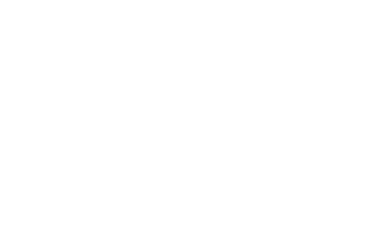

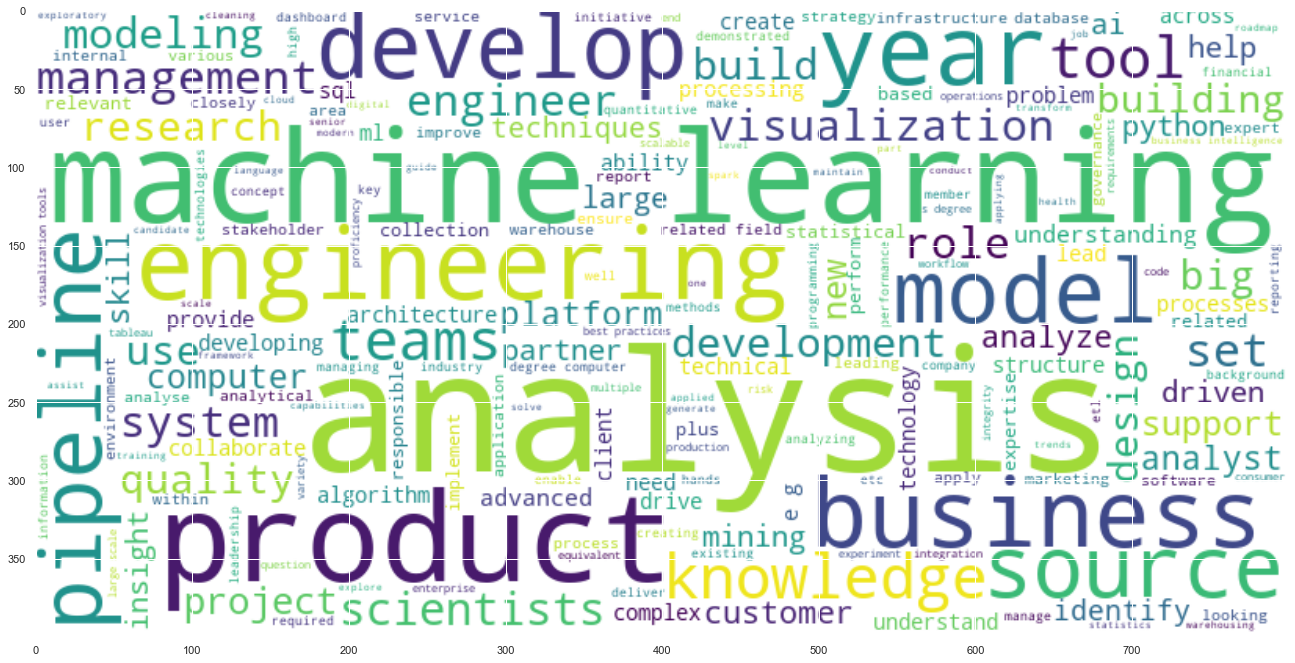

In [86]:
plt.axis("off")
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [87]:
# Next, analyzing the job descriptions that indicate a required degree such as Bachelor's, Master's, or PhD  
education = ['bachelor','master','phd'] 

In [88]:
# creating a new feature to store required degrees for each job posting
dfCombined['education'] = dfCombined['job_description'].str.findall('|'.join(education), flags=re.IGNORECASE).apply(set).str.join(', ')

In [89]:
# omitting all instances where a keyword for a degree is not present
dfCombined_education = dfCombined[dfCombined['education']!=""]

In [90]:
# checking how many instances have indicated a degree in job description
dfCombined_education.shape

(86, 12)

In [91]:
# cleaning up the data 
# replacing strings where multiple degrees are indicated (highest degree is taken in that case)
# for instance if a job requires bachelor's, master's, and a PhD, the feature would have a value of "PhD"
dfCombined_education.replace({'education': {'bachelor, master': "Master's", 'master': "Master's", 'phd, master': "PhD",'bachelor, phd, master': "PhD", 'phd':"PhD", 'bachelor':"Bachelor's"}}, inplace=True)

C:\Users\arnav\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



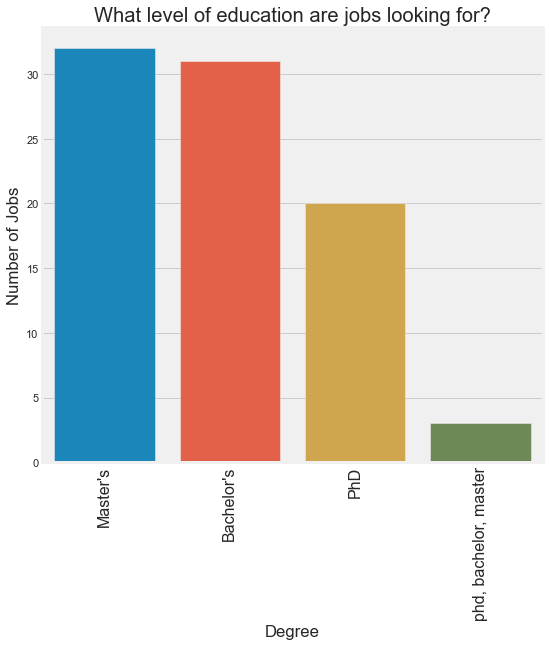

In [92]:
# visualizing the frequencies 
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
ax = sns.countplot(data=dfCombined_education,
                    x=dfCombined_education["education"],
                    order = dfCombined_education['education'].value_counts().index)

plt.xlabel("Degree")
plt.ylabel('Number of Jobs')
plt.title('What level of education are jobs looking for?')
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize=16)

## Are US based companies in NYC or SF, also hiring in Toronto?

In [93]:
dfUS = pd.concat([dfN, dfS])

In [94]:
dfUS.shape

(1253, 9)

In [95]:
dfT['US-based-company'] = np.where(dfT['company'].isin(dfUS['company']), 'True', 'False')

In [96]:
dfT['US-based-company'].value_counts().sort_values(ascending=False)

False    561
True     141
Name: US-based-company, dtype: int64

In [97]:
dfT_US = dfT.loc[dfT['US-based-company'] == 'True']

In [98]:
dfUSCount = dfT_US['company'].value_counts().sort_values(ascending=True).loc[lambda x : x>3]

In [99]:
dfUSCount

Veeva Systems      4
Index Exchange     4
S&P Global         4
Facebook App       4
Square             5
Accenture          5
EY                 6
Reddit             6
Pinterest          7
Citi              10
Tonal             11
Deloitte          14
Name: company, dtype: int64

<AxesSubplot:ylabel='company'>

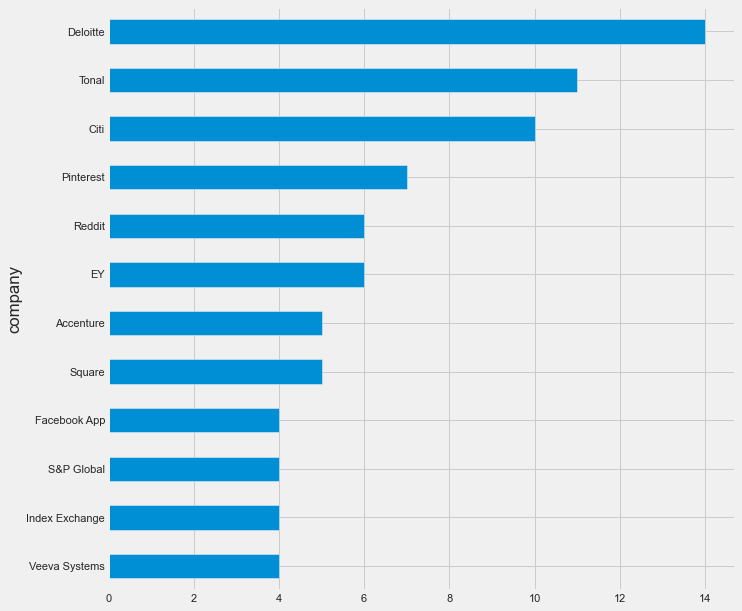

In [100]:
plt.figure(figsize=(10,10))
dfUSCount.plot(kind='barh',xlabel='company')

## For a few jobs where the job salary is listed, what does the average range look like? 

### Toronto Jobs

In [101]:
dfT['salary'] = dfT['job_salary'].str.replace(',', '').str.replace('$', '').str.replace('a year', '').str.replace('an hour', '')

In [102]:
dfT_salary = dfT[dfT['salary'].notnull()]

In [103]:
dfT_salary.shape

(17, 14)

In [104]:
dfT_salary_new = pd.DataFrame(dfT_salary["salary"].str.split('-').fillna('').tolist(), columns=['lower_range', 'upper_range'])

In [105]:
dfT_salary_new.head()

,lower_range,upper_range
0,40000,None
1,74877,110338
2,120000,160000
3,38000,74100
4,80000,None


In [106]:
cols = ['lower_range','upper_range']
dfT_salary_new[cols] = dfT_salary_new[cols].apply(pd.to_numeric,errors='coerce')

In [107]:
dfT_salary_new

,lower_range,upper_range
0,40000.00,NaN
1,74877.00,110338.00
2,120000.00,160000.00
3,38000.00,74100.00
4,80000.00,NaN
5,80418.00,100523.00
6,100000.00,NaN
7,45.00,75.00
8,104262.00,139013.00
9,85382.00,100229.00


In [108]:
dfT_salary_new.drop(dfT_salary_new[dfT_salary_new.lower_range < 1000].index, inplace=True) 
# removing rows where the salary provided is not annual

In [109]:
dfT_salary_new

,lower_range,upper_range
0,40000.0,NaN
1,74877.0,110338.0
2,120000.0,160000.0
3,38000.0,74100.0
4,80000.0,NaN
5,80418.0,100523.0
6,100000.0,NaN
8,104262.0,139013.0
9,85382.0,100229.0
10,50000.0,55400.0


In [110]:
dfT_salary_new[cols].mean()

lower_range     86009.266667
upper_range    109411.444444
dtype: float64